# DO UPVOTE AND FOLLOW

# ***THINGS YOU HAVE TO FOLLOW WHILE WALKING THROUGH THE WHOLE REPORT***

1. If you are familiar with python then only follow the code. 
2. The simple explanations about any visual or graph will be there.
3. There will be a brief conclusion of the report.
4. Every explanation is presented below the line of code's output.

***Enjoy***

# THIS DATASET CONTAINS:
* TV Shows and Movies listed on Netflix
* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# !!!PREDICTING HIT FUTURE MOVIES!!!

# THIS NOTEBOOK ANSWERS THE BELOW QUESTION:

# WHICH FUTURE MOVIE SHOULD NETFLIX CREATE?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

In [2]:
df= pd.read_csv("../input/netflix-shows/netflix_titles.csv")

In [3]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [4]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


In [5]:
plt.figure(figsize=(15, 10))
fig = px.pie(df["type"], names='type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.1], textinfo="percent+label")
fig.show()

<Figure size 1080x720 with 0 Axes>

In [6]:
df['rating'] = df["rating"].fillna('TV-MA')

In [7]:
plt.figure(figsize=(25, 20))
fig = px.pie(df["rating"], names='rating', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.1,0.2,0.1,0.1,0.1,0.1], textinfo="percent+label")
fig.show()

<Figure size 1800x1440 with 0 Axes>

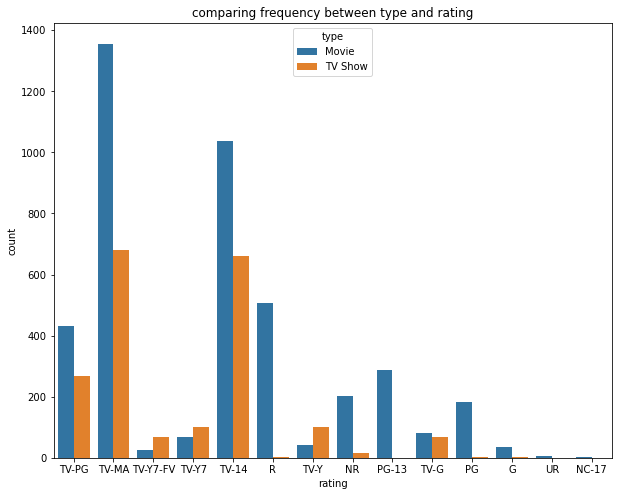

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

# Movie==> TV-MA,TV-14
# T.V shows ==> TV-MA,TV_14

In [9]:
from collections import Counter
country_data = df['country']
country_data = country_data.astype(str)
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['nan'], axis=0, inplace=True)
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
top20_country = country_counting[:20]

total : 7182
top 20 countries : 6318


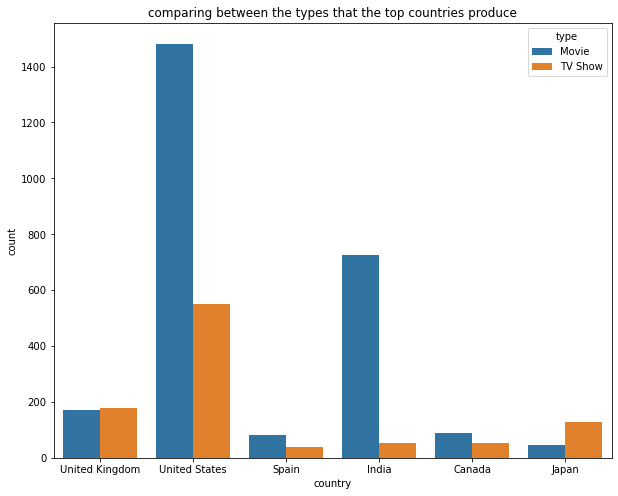

In [10]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

# UNITED KINGDM ==> TV-SHOWS,MOVIES
# UNITED STATES ==> MOVIES
# SPAIN ==> MOVIE
# INDIA ==> MOVIE
# CANADA ==> MOVIE
# JAPAN ==> TV-SHOWS

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
countries_0_7=['United States',"United Kingdom",'Spain','Japan','India','Canada']
def country_mov_dur(country):
    netflix_country_dur=df.loc[(df.country==str(country))&(df.type=='Movie')].duration[:]
    netflix_country_dur=netflix_country_dur.apply(lambda x : int(x.strip(' minSeaso')))
    
    return netflix_country_dur


* TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.
* TV-PG:This program contains material that parents may find unsuitable for younger children.
* R:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.
* PG-13:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
* NR or UR:If a film has not been submitted for a rating or is an uncut version of a film that was submitted
* PG:Some material may not be suitable for children,May contain some material parents might not like for their young children.
* TV-Y7:This program is designed for children age 7 and above.
* TV-G:This program is suitable for all ages.
* TV-Y:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.
* TV-Y7-FV:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.
* G:All ages admitted. Nothing that would offend parents for viewing by children.
* NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.

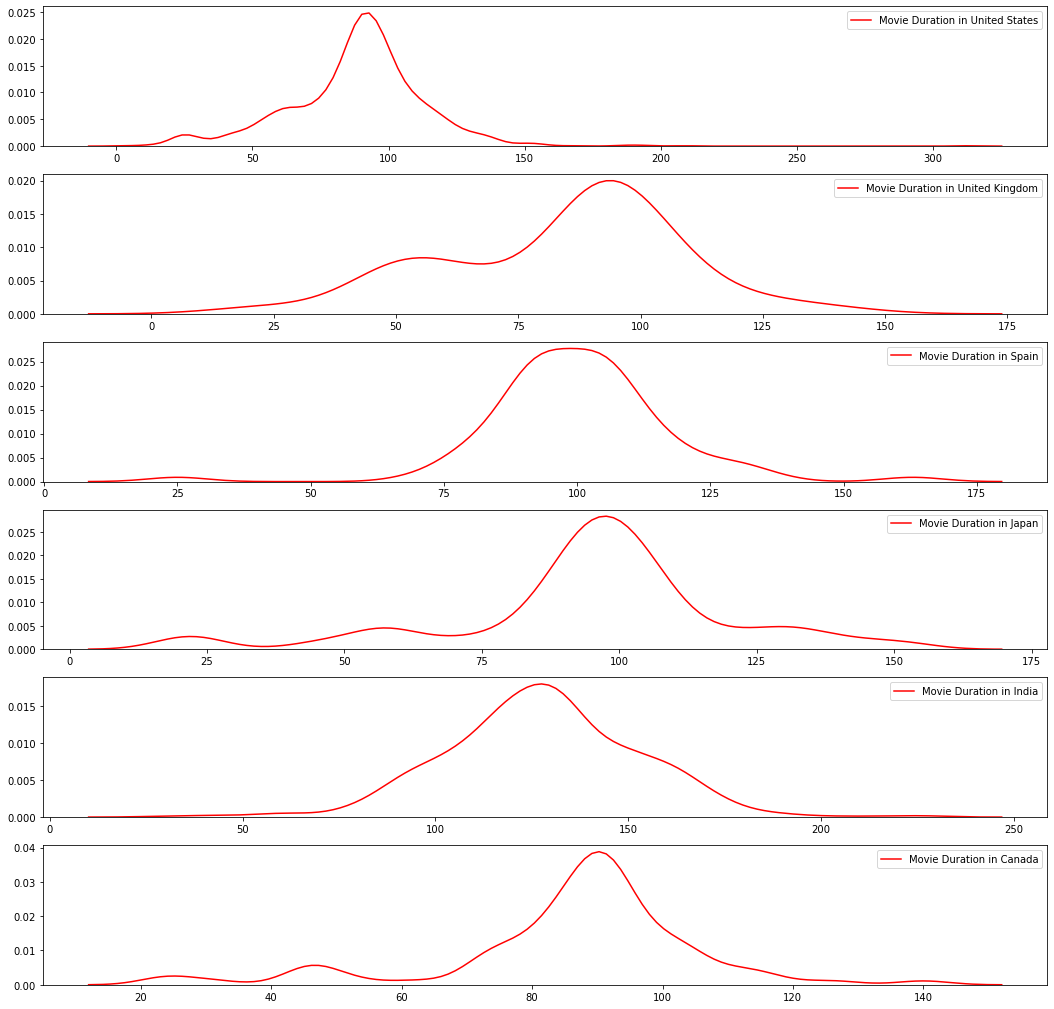

In [12]:
f, axes = plt.subplots(6,1,figsize=(18,18))
for i in range(6):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countries_0_7[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countries_0_7[i]),color='r',ax=axes[i])

# UNITED KINGDM ==> 95 MINS
# UNITED STATES ==> 95 MINS
# SPAIN ==> 100 MINS
# INDIA ==> 120 MINS
# CANADA ==> 90 MINS
# JAPAN ==> 95 MINS

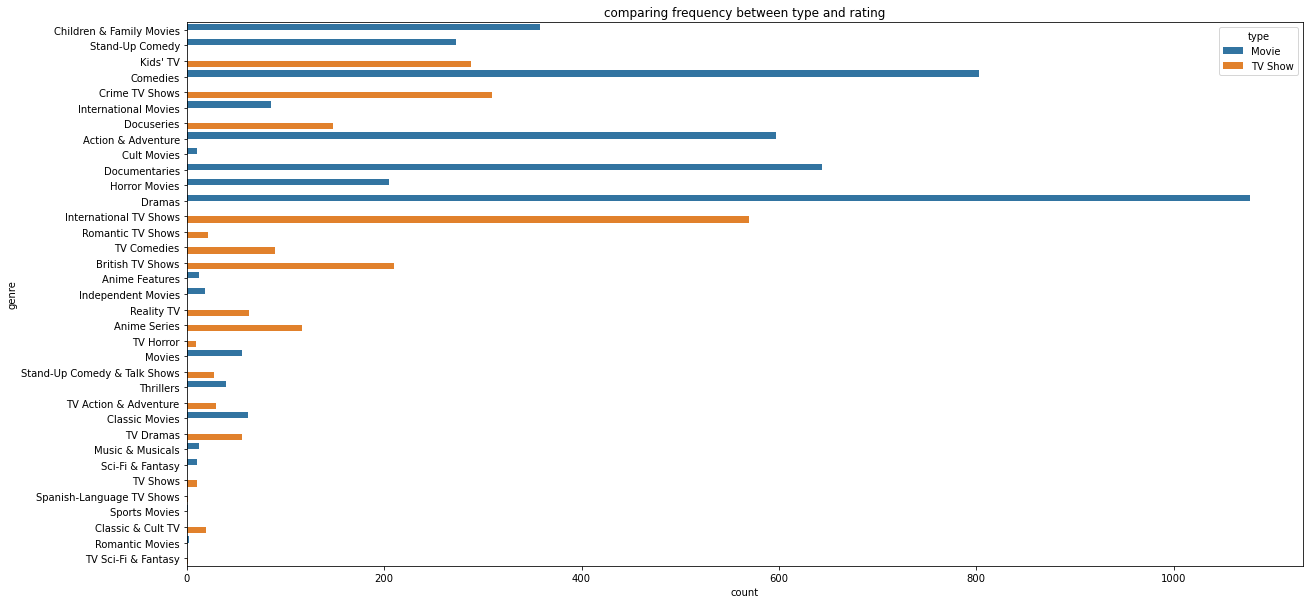

In [13]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df = df.applymap(lambda x: x[0] if isinstance(x, list) else x)
plt.figure(figsize=(20,10))
sns.countplot(y='genre',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

#  BEST RATING COUNTRY-WISE

In [14]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United Kingdom
TV-MA       39.942529
TV-14       23.275862
TV-PG       17.816092
R            7.471264
TV-G         6.034483
NR           2.298851
PG           0.862069
TV-Y7        0.862069
TV-Y         0.574713
G            0.287356
PG-13        0.287356
TV-Y7-FV     0.287356
Name: rating, dtype: float64
----------
United States
TV-MA       30.807087
TV-14       16.683071
R           13.385827
TV-PG       10.383858
PG-13        8.267717
PG           5.019685
NR           4.429134
TV-G         3.001969
TV-Y7        2.559055
TV-Y7-FV     2.066929
TV-Y         1.968504
G            1.279528
UR           0.098425
NC-17        0.049213
Name: rating, dtype: float64
----------
Spain
TV-MA    65.811966
TV-14    18.803419
NR        6.837607
TV-PG     3.418803
PG        1.709402
R         1.709402
TV-G      0.854701
TV-Y      0.854701
Name: rating, dtype: float64
----------
India
TV-14       54.182754
TV-MA       23.423423
TV-PG       16.731017
NR           2.445302
TV-G         0.900901
TV-Y7

# UNITED KINGDM ==> TV-MA
# UNITED STATES ==> TV-MA
# SPAIN ==> TV-MA
# INDIA ==> TV-14
# CANADA ==> TV-MA
# JAPAN ==> TV-14

# BEST DIRECTOR COUNTRY-WISE

In [15]:
def country_top_dir(country):
    indian_dir=df.loc[(df.country==str(country)) & (df.type=="Movie")]
    # indian_dir.director.value_counts()[:12]

    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")

    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]

    trace=go.Bar(x=directors.values[:10][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color='#a678de'))
    return trace
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_top_dir(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

# UNITED KINGDM ==> EDWARD COTTERILL
# UNITED STATES ==> JAY KARAS
# SPAIN ==> JAVIER RUIZ CALDERA
# INDIA ==> DAVID DHAWAN
# CANADA ==> JUSTIN G. DYCK
# JAPAN ==> MASAHIKO MURATA

In [16]:
d=df["country"].astype(str)
d=d.to_list()
z1=[]
for i in d:
    k=i.split(", ")
    z1.append(k)
# print(z1)
k=pd.DataFrame(z1,columns = ['alpha', 'beta','gamma','xerox','coxhie','ma','nj','ot','si','ng','h','yo'])
z=k.alpha.unique()
w=k.beta.unique()
a=k.gamma.unique()
b=k.xerox.unique()
c=k.coxhie.unique()
d=k.ma.unique()
z_new=np.concatenate((w,z,a,b,c,d), axis=0)
for i in range(len(z_new)):
    if z_new[i] == None:
        z_new[i] = "not_app"

j=np.unique(z_new)
list_type=j.tolist()
j=j.tolist()
d=np.array(z1)
# display(len(d),len(j))
x=np.zeros((6234,115))
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
j=le.fit_transform(j)


In [17]:
q=[]
for i in range(len(d)):
    u=d[i]
    u=le.transform(u)
    q.append(u)

In [18]:
for i in range(len(q)):
    oi=q[i]
    if len(oi)==1:
        oi2=oi[0]
        x[i][oi2]=1
    elif len(oi)==2:
        oi2=oi[0]
        oi3=oi[1]
        x[i][oi2]=1
        x[i][oi3]=1
x=x.astype(int)
cou=pd.DataFrame(x,columns=list_type)

In [19]:
cou

,Afghanistan,Albania,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belgium,Bermuda,...,United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe,nan,not_app
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6230,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_new=cou.loc[0:6234, ["United States","India", "United Kingdom", "Canada", "Spain", "Japan"]]
df = df.join(df_new)

In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,year_added,month_added,season_count,genre,United States,India,United Kingdom,Canada,Spain,Japan
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,...,2019.0,9.0,,Children & Family Movies,0,0,0,0,0,0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,...,2016.0,9.0,,Stand-Up Comedy,0,0,1,0,0,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,...,2018.0,9.0,1,Kids' TV,1,0,0,0,0,0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,...,2018.0,9.0,1,Kids' TV,1,0,0,0,0,0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,...,2017.0,9.0,,Comedies,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,,...,NaN,NaN,13,TV Action & Adventure,1,0,0,0,0,0
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,,...,NaN,NaN,4,TV Comedies,1,0,0,0,0,0
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,TV-MA,60,...,NaN,NaN,,Movies,0,0,0,0,0,0
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,,...,NaN,NaN,2,British TV Shows,0,0,1,0,0,0


# BEST GENRE COUNTRY-WISE

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN UNITED STATES')

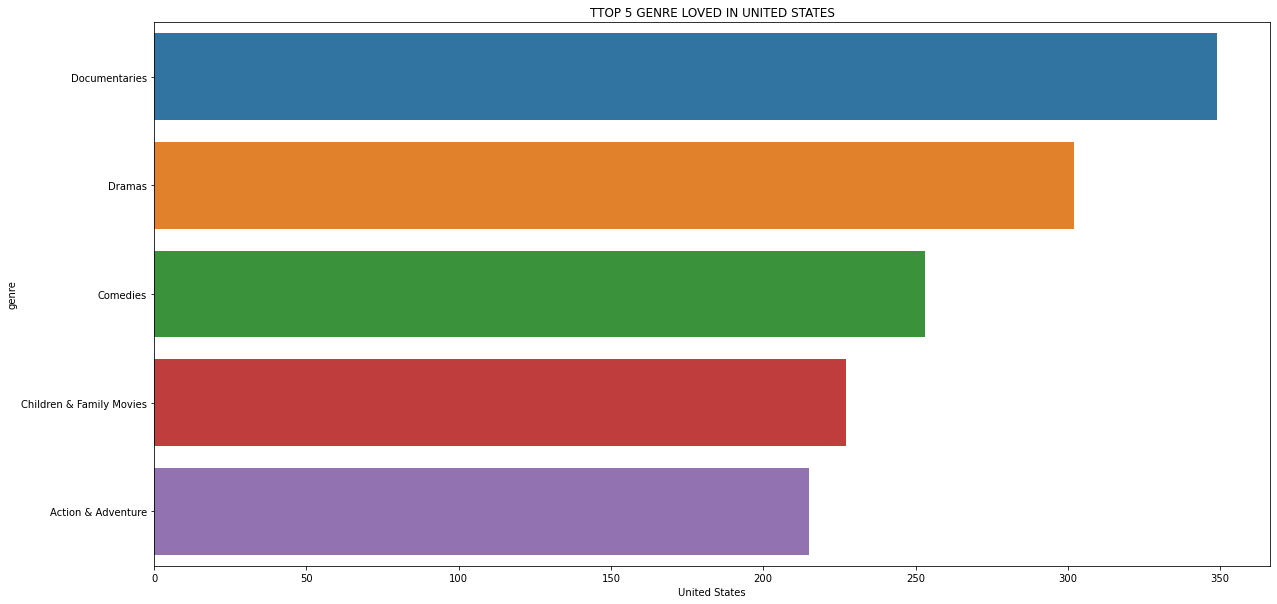

In [22]:
cat=df[["genre", "United States"]].groupby(['genre'], as_index=False).sum().sort_values(by='United States', ascending=False)[:5]
plt.figure(figsize=(20,10))
sns.barplot(x='United States', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN UNITED STATES')

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN United Kingdom')

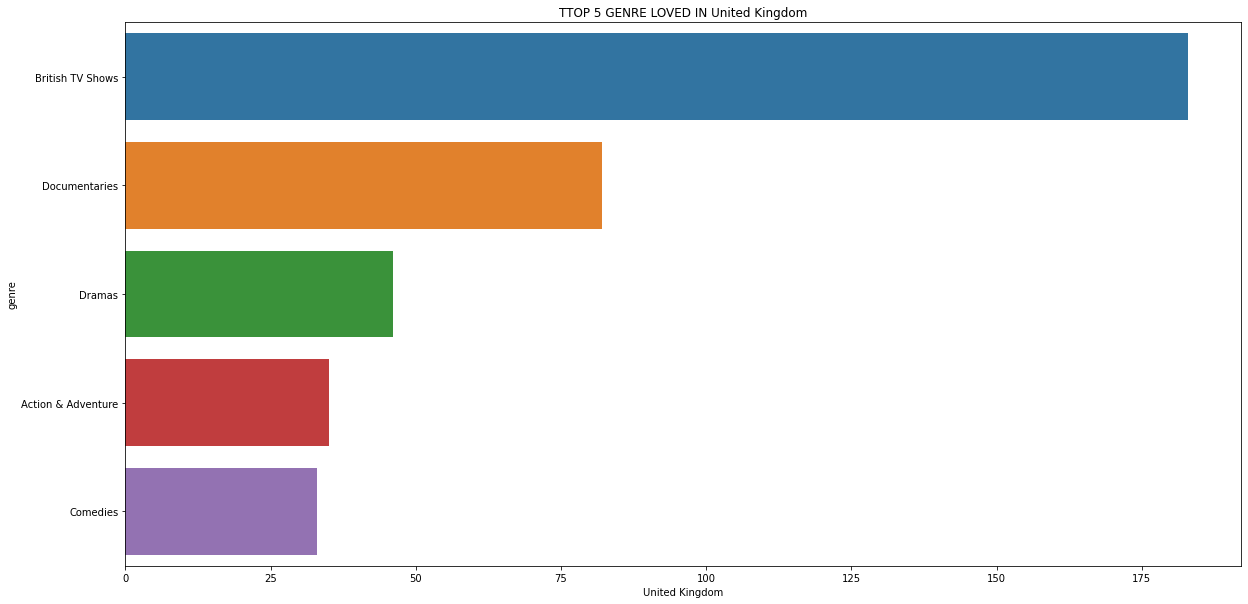

In [23]:
cat=df[["genre", "United Kingdom"]].groupby(['genre'], as_index=False).sum().sort_values(by='United Kingdom', ascending=False)[:5]
plt.figure(figsize=(20,10))
sns.barplot(x='United Kingdom', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN United Kingdom')

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN Japan')

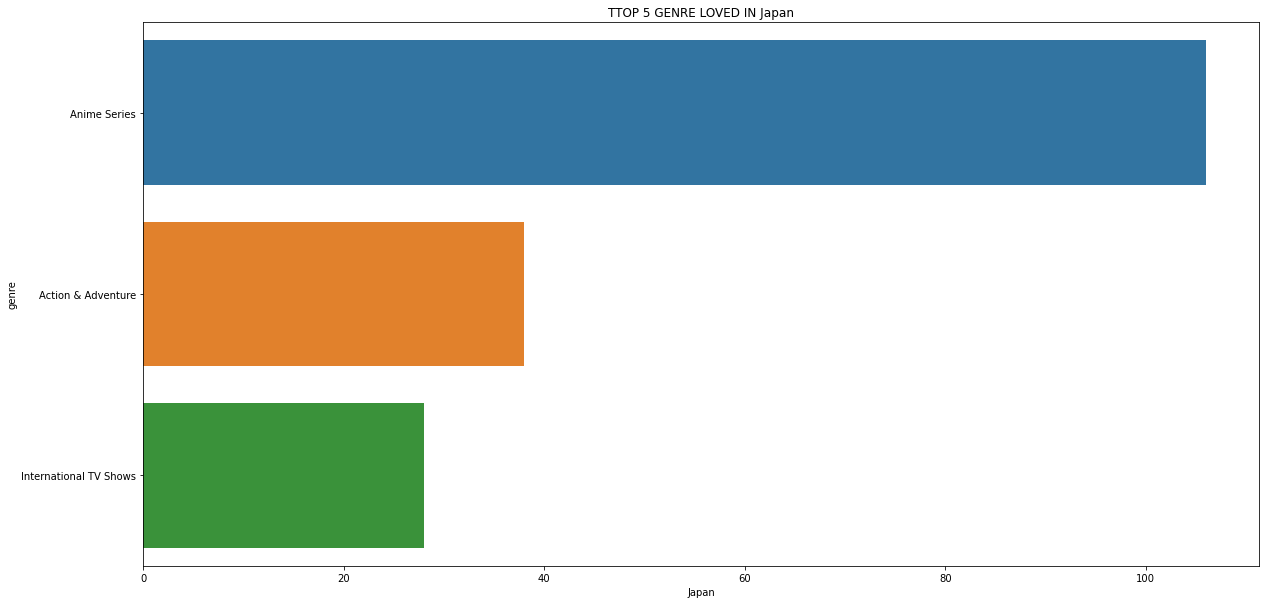

In [24]:
cat=df[["genre", "Japan"]].groupby(['genre'], as_index=False).sum().sort_values(by='Japan', ascending=False)[:3]
plt.figure(figsize=(20,10))
sns.barplot(x='Japan', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN Japan')

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN Spain')

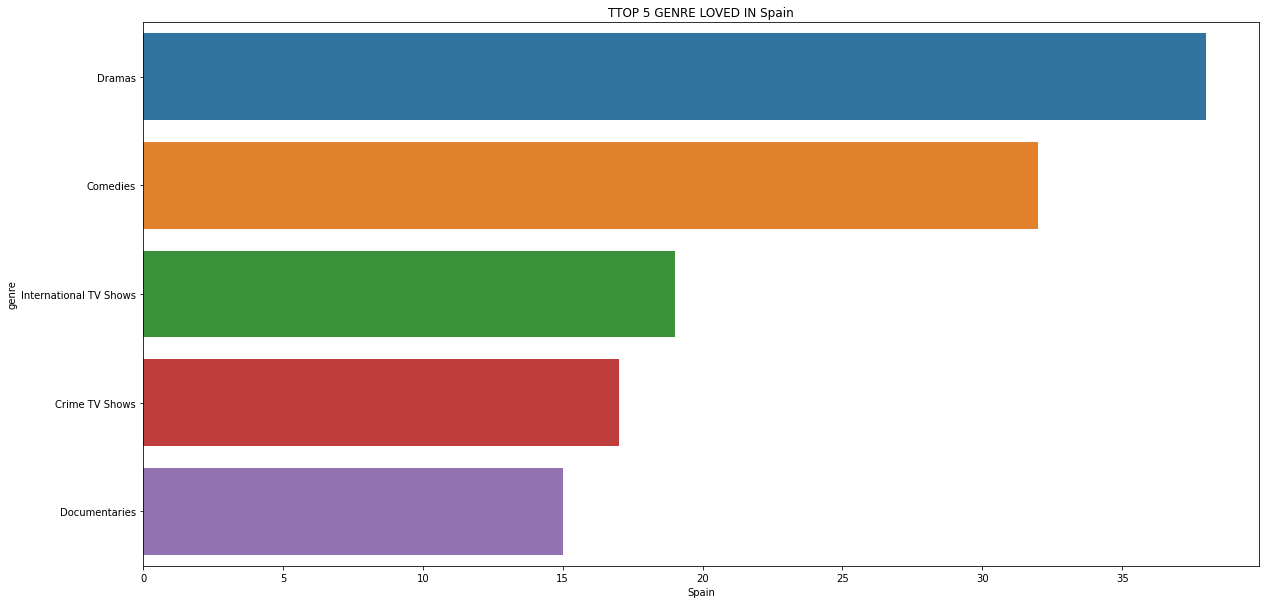

In [25]:
cat=df[["genre", "Spain"]].groupby(['genre'], as_index=False).sum().sort_values(by='Spain', ascending=False)[:5]
plt.figure(figsize=(20,10))
sns.barplot(x='Spain', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN Spain')

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN India')

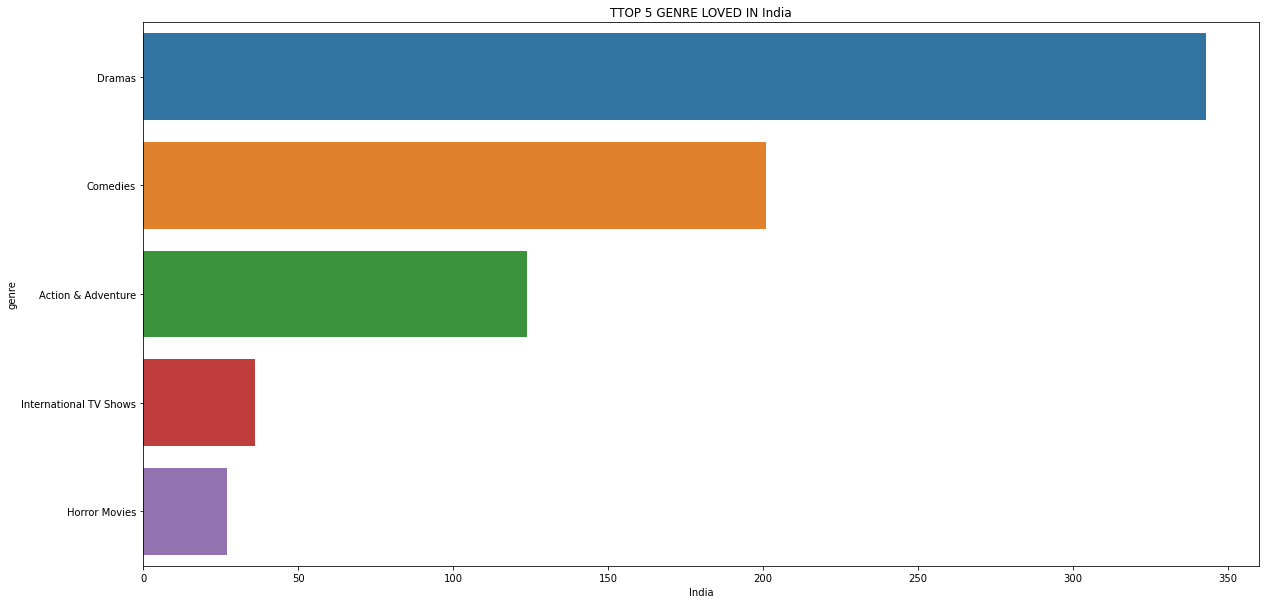

In [26]:
cat=df[["genre", "India"]].groupby(['genre'], as_index=False).sum().sort_values(by='India', ascending=False)[:5]
plt.figure(figsize=(20,10))
sns.barplot(x='India', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN India')

Text(0.5, 1.0, 'TTOP 5 GENRE LOVED IN Canada')

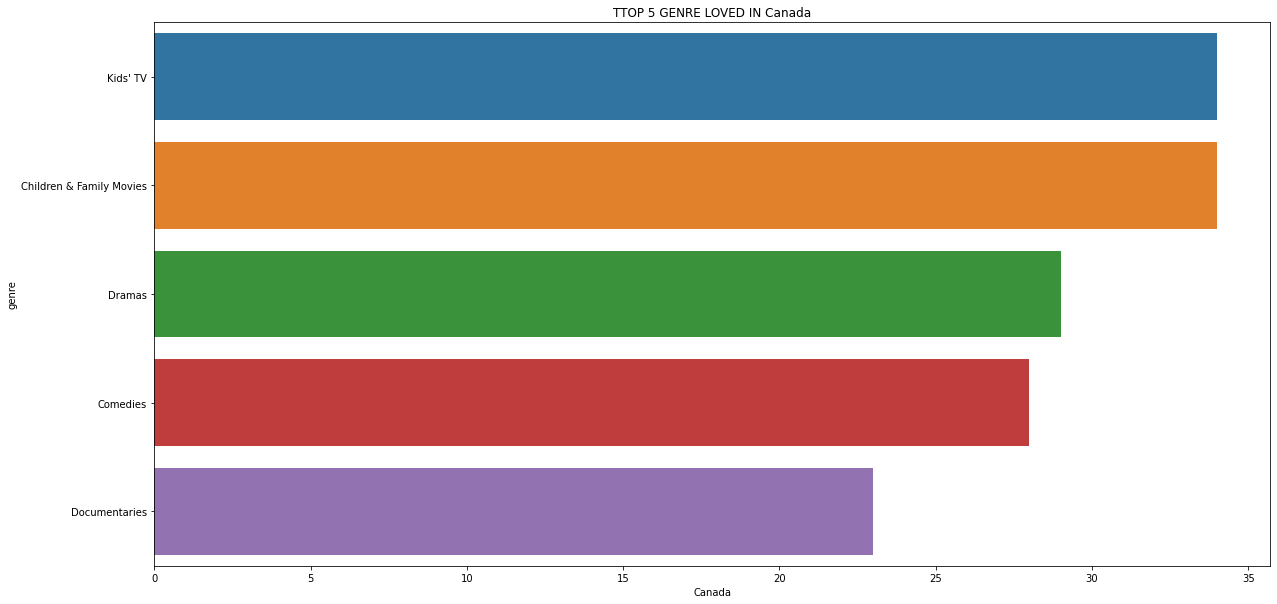

In [27]:
cat=df[["genre", "Canada"]].groupby(['genre'], as_index=False).sum().sort_values(by='Canada', ascending=False)[:5]
plt.figure(figsize=(20,10))
sns.barplot(x='Canada', y='genre', data=cat, orient = 'h')
plt.title('TTOP 5 GENRE LOVED IN Canada')

# UNITED KINGDM ==> DOCUMENTARIES, DRAMAS
# UNITED STATES ==> DOCUMENTARIES, COMEDIES,DRAMAS
# SPAIN ==> COMEDIES,DRAMAS
# INDIA ==> DRAMAS,COMEDIES
# CANADA ==> CHILDREN & FAMILY MOVIES,DRAMAS, COMEDIES
# JAPAN ==> ACTION & ADVENTURE, ANIME SERIES

In [28]:
d=df["cast"].astype(str)
d=d.to_list()
z1=[]
for i in d:
    k=i.split(", ")
    z1.append(k)
# print(z1)
k=pd.DataFrame(z1,columns = ['alpha', 'beta','gamma','xerox','coxhie','ma','nj','ot','si','ng','h','yo','xerox1','coxhie1','xerox2','coxhie2','ma1','nj1','ot1',
                             'si1','ng1','h1','yo1','xerox3','coxhie3','ma3','nj3','ot3','si3','ng3','h3','yo3''yo4','xerox4','coxhie4','ma4','nj4','ot4',
                             'si4','ng4','h4','yo5','xerox5','coxhie5','ma5','nj5','ot5','si5','ng5','h5','yo6'])

z=k.alpha.unique()
w=k.beta.unique()
a=k.gamma.unique()
b=k.xerox.unique()
c=k.coxhie.unique()
d=k.ma.unique()
a1=k.nj.unique()
a2=k.ot.unique()
a3=k.si.unique()
a4=k.ng.unique()
a5=k.h.unique()
a6=k.yo.unique()
a7=k.xerox1.unique()
a8=k.coxhie1.unique()
a9=k.xerox2.unique()
a10=k.coxhie2.unique()
a11=k.ma1.unique()
a12=k.nj1.unique()
a13=k.ot1.unique()
a14=k.si1.unique()
a15=k.ng1.unique()
a16=k.h1.unique()
a17=k.yo1.unique()
a18=k.xerox3.unique()
a19=k.coxhie3.unique()
a20=k.ma3.unique()
a21=k.nj3.unique()
a22=k.ot3.unique()
a23=k.si3.unique()
a24=k.ng3.unique()
a25=k.h3.unique()
a26=k.yo3yo4.unique()
# a27=k.yo4.unique()
a28=k.ma4.unique()
a29=k.xerox4.unique()
a30=k.coxhie4.unique()
a112=k.nj4.unique()
a32=k.ot4.unique()
a33=k.si4.unique()
a34=k.ng4.unique()
a35=k.h4.unique()
a36=k.yo5.unique()
a37=k.xerox5.unique()
a38=k.coxhie5.unique()
a39=k.ma5.unique()
a42=k.nj5.unique()
a43=k.ot5.unique()
a44=k.si5.unique()
a45=k.ng5.unique()
a46=k.h5.unique()
a47=k.yo6.unique()
z_new=np.concatenate((w,z,a,b,c,d,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,
                      a25,a26,a28,a29,a30,a112,a32,a33,a34,a35,a36,a37,a38,a39,
                    a42,a43,a44,a45,a46,a47), axis=0)
for i in range(len(z_new)):
    if z_new[i] == None:
        z_new[i] = "not_app"

j=np.unique(z_new)
list_type=j.tolist()
j=j.tolist()
d=np.array(z1)
# display(len(d),len(j))
x=np.zeros((6234,27407))
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
j=le.fit_transform(j)

In [29]:
display(len(d),len(j))

6234

27407

In [30]:
try:
    
    q=[]
    for i in range(len(d)):
        u=d[i]
        u=le.transform(u)
        q.append(u)
except Exception as e:
    print(e)

In [31]:
for i in range(len(q)):
    oi=q[i]
    if len(oi)==1:
        oi2=oi[0]
        x[i][oi2]=1
    elif len(oi)==2:
        oi2=oi[0]
        oi3=oi[1]
        x[i][oi2]=1
        x[i][oi3]=1
x=x.astype(int)
yoi=pd.DataFrame(x,columns=list_type)

In [32]:
for i in yoi.columns:
    a=yoi[i].sum()
    if a > 5:
        print(i)
        print(a)
    

Craig Sechler
6
David Attenborough
18
Jeff Dunham
8
Samuel West
10
Stephen Fry
7
nan
570


# ACTORS/ACTRESS WHO HAVE DONE MORE THAN 5 MOVIES

# ASSUMPTIONS ==>
**1. ASSUMING THAT EVERY SINGLE PICTURE IS A HIT OR HAVE A IMDB OF 10.**

# PREDICTIONS ==>

# UNITED KINGDOM
# **Populace of The United Kingdom may prefers movies with duration of 95 minutes rated under the Category TV-MA. Moreover If the movie is directed by edward cotterill under the genre of Documentaries or Dramas or both with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.**

# UNITED STATES
# Populace of The United States may prefers movies with duration of 95 minutes rated under the Category TV-MA. Moreover If the movie is directed by Jay Karas under the genre of DOCUMENTARIES, COMEDIES,DRAMAS with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.

# SPAIN
# **Populace of Spain may prefers movies with duration of 95 minutes rated under the Category TV-MA. Moreover If the movie is directed by Javier Ruiz Caldera under the genre of Comedies or Dramas or both with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.**

# INDIA
# **Populace of India may prefers movies with duration of 95 minutes rated under the Category TV-14. Moreover If the movie is directed by David Dhawan under the genre of Comedies or Dramas or both with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.**

# CANADA
# **Populace of Canada may prefers movies with duration of 95 minutes rated under the Category TV-MA. Moreover If the movie is directed by Justin G.Dyck under the genre of Children & Family or Dramas or Comedies with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.**

# JAPAN 
# **Populace of Japan may prefers movies with duration of 95 minutes rated under the Category TV-14. Moreover If the movie is directed by Masahiko Murata under the genre of Action & adventure or Anime or both with the exception cast as Craig Sechler, David Attenborough, Jeff Dunham, Samuel West or Stephen Fry will be a hoot and a half.**

# THE END

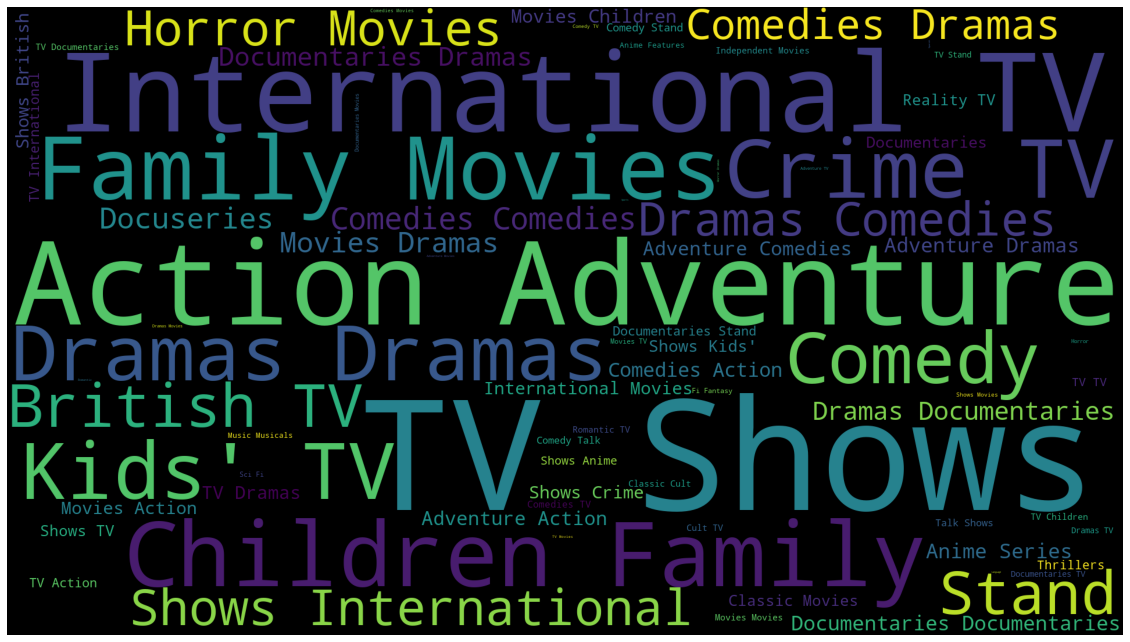

In [33]:
plt.subplots(figsize=(20,35))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.genre))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()